# Математическая статистика

Статистику любят спрашивать на собеседованиях и она убедительно выглядит в отчетах. 

Также используется "под капотом" многих моделей машинного обучения. 

Напрямую со статистикой работают далеко не во всех задачах.

<i>"Существуют три вида лжи: ложь, наглая ложь и статистика"</i> - Марк Твен

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Закон больших чисел

Один из основных законов, который связывает теорию вероятностей и статистику

In [115]:
mu = 10
for n in [2, 10, 100, 1000, 100000]:
    mean = np.random.normal(mu, 10, size=n).mean()
    print(f'n={n} mu={mu:.2f}, mean={mean:.2f}, error={10-mean:.2f}')

n=2 mu=10.00, mean=-2.03, error=12.03
n=10 mu=10.00, mean=11.08, error=-1.08
n=100 mu=10.00, mean=9.06, error=0.94
n=1000 mu=10.00, mean=10.25, error=-0.25
n=100000 mu=10.00, mean=9.96, error=0.04


С ростом размера выборки, ее среднее будет стремиться к матожиданию.

Есть обратная [теорема о бесконечных обезьянах](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%BE_%D0%B1%D0%B5%D1%81%D0%BA%D0%BE%D0%BD%D0%B5%D1%87%D0%BD%D1%8B%D1%85_%D0%BE%D0%B1%D0%B5%D0%B7%D1%8C%D1%8F%D0%BD%D0%B0%D1%85).

## Задача

Вычислить вероятность того, что обезьяна напишет слово "абракадабра" на клавиатуре с 40 клавишами.

In [125]:
word = 'абракадабра'
n_keys = 40

# Ваш код здесь


## ЦПТ (Центральная предельная теорема)

Сгенерируем из равномреного распределения от 0 до 1 несколько значений

(array([538., 525., 504., 453., 462., 511., 512., 502., 520., 473.]),
 array([3.60394215e-04, 1.00298641e-01, 2.00236888e-01, 3.00175136e-01,
        4.00113383e-01, 5.00051630e-01, 5.99989877e-01, 6.99928124e-01,
        7.99866371e-01, 8.99804618e-01, 9.99742865e-01]),
 <BarContainer object of 10 artists>)

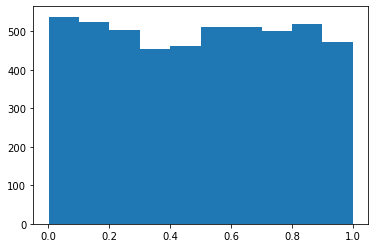

In [52]:
uniform_dist = np.random.uniform(0, 1, size=5000)
plt.hist(uniform_dist)

Сгенерируем большое количество выборок из этого распределения, возьмем для каждой из них среднее и из средних построим гистограмму.

Какое распределение напоминает?

(array([ 27.,  50.,  75.,  82., 119., 138., 158., 147., 205., 202., 222.,
        252., 279., 304., 331., 332., 252., 262., 259., 229., 200., 175.,
        164., 133., 127.,  84.,  75.,  59.,  41.,  17.]),
 array([0.01869431, 0.05116529, 0.08363627, 0.11610725, 0.14857824,
        0.18104922, 0.2135202 , 0.24599118, 0.27846216, 0.31093314,
        0.34340413, 0.37587511, 0.40834609, 0.44081707, 0.47328805,
        0.50575904, 0.53823002, 0.570701  , 0.60317198, 0.63564296,
        0.66811394, 0.70058493, 0.73305591, 0.76552689, 0.79799787,
        0.83046885, 0.86293984, 0.89541082, 0.9278818 , 0.96035278,
        0.99282376]),
 <BarContainer object of 30 artists>)

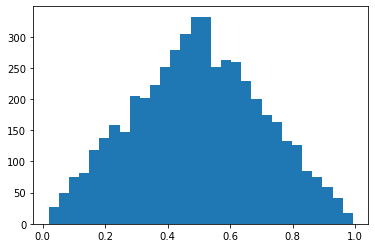

In [306]:
n = 2
sample = np.random.uniform(0, 1, size=(5000, n))
mean = sample.mean(axis=1)
plt.hist(mean, bins=30)

Возьмем любое другое распределение (например, биномиальное)

При каком n распределение стабильно выглядит как нормальное?

(array([1121.,    0., 1681.,    0.,    0., 1299.,    0.,    0.,  628.,
           0.,    0.,  197.,    0.,    0.,   50.,    0.,    0.,   19.,
           0.,    5.]),
 array([0.   , 0.175, 0.35 , 0.525, 0.7  , 0.875, 1.05 , 1.225, 1.4  ,
        1.575, 1.75 , 1.925, 2.1  , 2.275, 2.45 , 2.625, 2.8  , 2.975,
        3.15 , 3.325, 3.5  ]),
 <BarContainer object of 20 artists>)

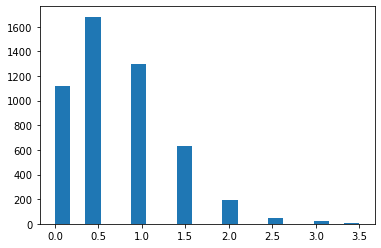

In [127]:
n = 2
sample = np.random.binomial(15, 0.05, size=(5000, n)).mean(axis=1)
plt.hist(sample, bins=20)

Центральная предельная теорема позволяет привести любое распределение к нормальному.

С помощью ЦПТ можно строить доверительный интервалы для любого распределения

## Задача

Для бета-распределения с параметрами 1 и 0.1, найти n, для которого распределение средних значений выборок будет похоже на нормальное.

(array([ 16.,  30.,  86., 151., 222., 224., 158.,  88.,  22.,   3.]),
 array([0.85241778, 0.86408781, 0.87575784, 0.88742788, 0.89909791,
        0.91076794, 0.92243798, 0.93410801, 0.94577804, 0.95744808,
        0.96911811]),
 <BarContainer object of 10 artists>)

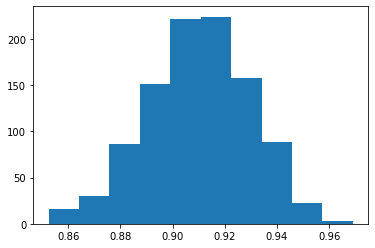

In [336]:
n = 100
means = np.random.beta(1, 0.1, size=(1000, n)).mean(axis=1)
plt.hist(means)

## Доверительные интервалы

Иногда мы хотим не только оценить среднее выборки, но и понять в каком интервале это значение может меняться с заданным уровнем значимости.

Например, мы знаем историю по продажам магазина за год и хотим узнать сколько в среднем продаж в месяц совершает магазин. 

Помимо самого числа нам хотелось бы знать с вероятностью, например, 95%, в каком интервале может меняться это значение.

### Вариант 1. Настоящая дисперсия известна

Оценка получится довольно точной

In [299]:
mean = 100
std = 10 # Настоящее среднеквадратичное отклонение
alpha = 0.05
n = 12

In [300]:
from scipy.stats import norm

def get_confidence_interval(mean, std, n, alpha):
    h = norm.ppf(1 - alpha / 2) * std / np.sqrt(n)
    return mean - h, mean + h

confidence_interval = get_confidence_interval(mean, std, n, alpha)

confidence_interval

(94.34207132961915, 105.65792867038085)

### Вариант 2. Настоящая дисперсия неизвестна

Здесь std - среднеквадратичное отклонение, которое мы могли посчитать по данным

Оценка получится неточной

In [303]:
from scipy.stats import t

t.interval(1 - alpha, n - 1, loc=mean, scale=std)

(77.99014839917051, 122.00985160082949)

В этом случае мы используем T-распределение Стьюдента, которое похоже на нормальное распределение. 

![student](images/student_t_distr.png)

На картинке параметр $v$ - количество степеней свободы распределения. Если устремим к бесконечности, то получим нормальное распределение.

## Проверка гипотез

Алгоритм проверки статистических гипотез:

- Формулируем гипотезы H0 и H1
- Выбираем уровень значимости
- Определяем статистический критерий
- Рассчитываем критерий
- Принимаем решение

### Шаг 1. Формулируем гипотезы

Обычно формулируются две взаимоисключающие гипотезы. 

Гипотеза $H_0$ принимается за базовую (как было до нашего вмешательства, например). Альтернативная гипотеза $H_1$ показывает то, чего мы хотим достичь или что хотим доказать. 

Основные статистические тесты придумали до нас, нам остается только их правильно применить и не допустить ошибок в интерпретации.

Например:

- $H_0$: матожидание величины $F$ равно $a$
- $H_1$: матожидание не равно $a$/больше $a$/меньше $a$

Или:

- $H_0$: Распределение $G$ - нормальное
- $H_1$: Распределение принадлежит другому классу

Или:

- $H_0$: изменение цвета кнопки изменило количество кликов по ней
- $H_1$: изменение цвета кнопки не повлияло на действия пользователя

Или:

- $H_0$: новое лекарство не влияет на выздоровление пациентов
- $H_1$: с новым лекарством люди выздоравливают от болезни $X$ быстрее

### Шаг 2. Выбираем уровень значимости

Насколько мы хотим быть уверены в результатах теста?

Обычно берут уровень значимости 95%, и это некий стандарт (вам поверят, что ваш метод работает), но для каждой задачи надо выбирать свой уровень значимости. 


## Задача 

Человечество изобрело лекарство от рака! Клинические тесты показали, что оно действует с уровнем значимости 0.05, но у лекарства очень плохие побочные эффекты. 

Первая партия лекарства составила 50 млн ампул.

Сколько людей можно было бы спасти, если бы проводимый тест был с уровнем значимости 0.01?

In [337]:
# Ваш код здесь

### Ошибки I и II рода
Существует два типа ошибок - ошибки первого и второго рода.

Уровень значимости - вероятность не допустить ошибку первого рода

Какую ошибку "можно" допустить, а какую нельзя?

![type_error](images/type_error.jpg)

### Шаг 3. Определяем статистический критерий

Существует множество статистических критериев, которые позволяют каким-то образом оценить по данным эксперимента его результат.

Критерий выбирается от задачи, их существует большое множество, [на википедии можно посмотреть самые основные](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9)

Скорее всего, нужный вам критерий есть в scipy.

Если в scipy нет нужного критерия, то он есть в другой python-библиотеке

![critical_area](images/critical_area.png)

### Шаг 4. Рассчитываем критерий

Находим критическую область, находим значение статистического критерия для наших данных

## Задача

Реализовать функцию для подсчета одновыборочного t-критерия Стьюдента

## $T = \frac{a - a_0}{\sigma / \sqrt{df}}$

$df$ - количество степеней свободы и равно $n - 1$

In [526]:
def t_stat(sample_mean, a0, std, df):
    # Ваш код здесь
    pass

### Шаг 5. Принимаем решение

Если значение критерий входит в критическую область, отклоняем гипотезу $H_0$ и принимаем $H_1$.

Если лежит не в критической области, то не можем отклонить $H_0$

## Пример

Дана выборка с ростом людей. Известно, что рост людей (генеральной совокупности) распределен нормально. Проверить, равен ли средний рост людей 170 с уровнем значимости 0.05.

Применим [t-критерий Стьюдента](https://ru.wikipedia.org/wiki/T-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0).

$H_0: a = a_0$

$H_1: a \neq a_0 $

In [493]:
n = 100
alpha = 0.05
real_e = 170
real_d = 10
a0 = 170
sample = np.random.normal(real_e, real_d, size=n)

In [520]:
# считаем статистику по данным
statistic = t_stat(sample.mean(), a0, sample.std(), n - 1)

# критическая область считается для распределения стьюдента
critical_value = t.ppf(1 - alpha / 2, n - 1)

if abs(statistic) < critical_value:
    print('H0 справедлива')
else:
    print('H1 справедлива')

H0 справедлива


Посчитаем p-value

In [522]:
p0 = t.cdf(statistic, n - 1) # Левосторонняя альтернатива
p1 = 1 - t.cdf(statistic, n - 1) # Правосторонняя альтернатива
p_value = 2 * min(p0, p1) # Двусторонняя альтернатива
p_value

0.4736557003779305

Проделаем тоже самое с помощью scipy

In [514]:
result = scipy.stats.ttest_1samp(sample, 170)
result

Ttest_1sampResult(statistic=0.7192917229001672, pvalue=0.4736557003779305)

In [502]:
result.statistic, result.pvalue

(0.7192917229001672, 0.4736557003779305)

## Задача

Сгенерировать две выборки роста людей с одинаковыми дисперсиями и разными матожиданиями (из нормального распределения). 

Опровергнуть гипотезу $H_0$ о том, что матожидания этих распределений равны.

Для решения можно использовать scipy.stats.ttest_ind.

Важно: тест работает только для распределений с равными дисперсиями. Можно поставить разные дисперсии и одинаковые матожидания и посмотреть на результаты.

In [524]:
# Ваш код здесь


## Задача*

Взять данные о погоде (data/weather.csv) и проверить на нормальность распределение первых разностей температуры. Использовать уровень значимости 0.05. Использовать любой критерий для проверки на нормальность.

In [527]:
# Ваш код здесь


# Домашняя работа

Для домашней работы использовать данные Титаника

## Easy

Оценить с помощью доверительных интервалов:
- выживаемость всех пассажиров (оценить среднее по isSurvived)
- выживаемость женщин
- выживаемость людей с каютами первого класса

Ответить на вопросы:
- какой вариант оценки доверительных интервалов нужно использовать в данной задаче и почему?
- какая из ошибок более критична для данной задачи - I или II рода?

## Medium

- Проверить гипотезу о том, что женщины выживают чаще мужчин с уровнем значимости 0.05
- Проверить гипотезу о том, что дети выживают чаще, чем взрослые

## Hard

Одной из важнейших тем в статистике является множественная проверка гипотез. 

Если нужно сделать несколько тестов для получения результата (например, хотим проверить сложную гипотезу = гипотеза 1 И гипотеза 2 И гипотеза 3), то вероятность совершить ошибку первого рода будет расти с каждой новой гипотезой.

[Прочитать подробнее можно здесь](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%83%D1%8E_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7)

Задание состоит в том, чтобы выдвинуть несколько гипотез (можно использовать гипотезы из задач Easy и Medium), и проверить их сначала без поправки на множественную проверку гипотез, а потом с ней. 

Можно использовать любой метод поправки, главное его указать и по возможности обосновать.

## Hard*

Используя результаты из задачи Hard (если нужно, провести дополнительные эксперименты), построить модель, которая будет определять, выживет ли человек на Титанике.

Решение загрузить на Kaggle, результат указать в ноутбуке. 

Получилось ли обогнать базовую модель?